In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df2 = pd.read_excel('C:/Users/ren.x.1/Desktop/VS_Pricing/VS_2.xlsx',encoding='gbk')
df2.shape

(386, 5)

In [3]:
df2.head()

,DatePay,SALES_IN_ML,ACT PRICE_PER_ML,LIST_PRICE_PER ML,DISCOUNT_PER_ML
0,2015-12-01,400735,0.125531,0.175639,0.285293
1,2015-12-02,256915,0.131791,0.176807,0.254603
2,2015-12-03,317555,0.120362,0.173412,0.305923
3,2015-12-04,219775,0.124365,0.174171,0.285962
4,2015-12-05,228325,0.129025,0.179393,0.280767


In [4]:
df2['DatePay'] = pd.to_datetime(df2.DatePay)

In [5]:
df2.dtypes

DatePay              datetime64[ns]
SALES_IN_ML                   int64
ACT PRICE_PER_ML            float64
LIST_PRICE_PER ML           float64
DISCOUNT_PER_ML             float64
dtype: object

In [6]:
df2 = df2.set_index(df2.DatePay)

In [7]:
df2 = df2.drop(['DatePay'],axis = 1)

In [8]:
df2.head()

,SALES_IN_ML,ACT PRICE_PER_ML,LIST_PRICE_PER ML,DISCOUNT_PER_ML
DatePay,,,,
2015-12-01,400735,0.125531,0.175639,0.285293
2015-12-02,256915,0.131791,0.176807,0.254603
2015-12-03,317555,0.120362,0.173412,0.305923
2015-12-04,219775,0.124365,0.174171,0.285962
2015-12-05,228325,0.129025,0.179393,0.280767


In [10]:
df_spending = pd.read_excel('C:/Users/ren.x.1/Desktop/VS_Pricing/VS_Spending.xlsx',encoding='gbk')
df_spending.shape

(105, 4)

In [11]:
df_spending.head()

,Date,DSP,DMP,YSF
0,2016-07-01,5105.55,498.59,0.0
1,2016-07-02,432.01,0.00,0.0
2,2016-07-09,8574.95,4965.02,0.0
3,2016-07-10,23940.77,13104.99,0.0
4,2016-07-11,29229.03,14131.40,0.0


In [12]:
df_spending['Date'] = pd.to_datetime(df_spending.Date)

In [13]:
df_spending = df_spending.set_index(df_spending.Date)

In [16]:
df_spending.drop(['Date','DMP','YSF'],axis =1, inplace = True)

In [20]:
df_spending[-1:]

,DSP
Date,
2016-12-20,0.0


In [22]:
start = pd.datetime(2016, 7, 1)
end = pd.datetime(2016, 12, 20)
rng = pd.date_range(start, end)


In [28]:
df_DSP = df_spending.join(pd.DataFrame(index=rng),how = 'right').fillna(0)

In [370]:
df4 = df2.join(df_DSP, how='inner',rsuffix = '_3' , sort=True)

In [371]:
df4.head()

,SALES_IN_ML,ACT PRICE_PER_ML,LIST_PRICE_PER ML,DISCOUNT_PER_ML,DSP
2016-07-01,918340,0.122444,0.185080,0.338426,5105.55
2016-07-02,1052970,0.123322,0.185794,0.336245,432.01
2016-07-03,1209650,0.124562,0.187587,0.335977,0.00
2016-07-04,976025,0.127286,0.188288,0.323981,0.00
2016-07-05,964475,0.131118,0.193537,0.322518,0.00


In [372]:
df4['IsD11'] = 0

In [373]:
df4.IsD11[np.where(df4.index == '2016-11-11')[0]] = 1

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [374]:
df4['IsD11PS'] = 0

In [375]:
df4.IsD11PS[np.where((df4.index >= '2016-10-21') & (df4.index <= '2016-11-10'))[0]] = 1

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [376]:
df4['IsD9'] = 0
df4.IsD9[np.where((df4.index >= '2016-09-09') & (df4.index <= '2016-09-10'))[0]] = 1

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [377]:
df4['IsD12PS'] = 0
df4.IsD12PS[np.where((df4.index >= '2016-12-05') & (df4.index <= '2016-12-11'))[0]] = 1

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [378]:
df4['IsD12'] = 0
df4.IsD12[np.where(df4.index == '2016-12-12')[0]] = 1

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [379]:
df4['IsOtherLV1Campaign'] = 0
df4.IsOtherLV1Campaign[np.where((df4.index >= '2016-12-21') & (df4.index <= '2016-12-23')|(df4.index >= '2016-10-03') & (df4.index <= '2016-10-09')|(df4.index >= '2016-08-15') & (df4.index <= '2016-08-16'))[0]] = 1

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [380]:
y = df4.pop('SALES_IN_ML')

In [381]:
df4.head()

,ACT PRICE_PER_ML,LIST_PRICE_PER ML,DISCOUNT_PER_ML,DSP,IsD11,IsD11PS,IsD9,IsD12PS,IsD12,IsOtherLV1Campaign
2016-07-01,0.122444,0.185080,0.338426,5105.55,0,0,0,0,0,0
2016-07-02,0.123322,0.185794,0.336245,432.01,0,0,0,0,0,0
2016-07-03,0.124562,0.187587,0.335977,0.00,0,0,0,0,0,0
2016-07-04,0.127286,0.188288,0.323981,0.00,0,0,0,0,0,0
2016-07-05,0.131118,0.193537,0.322518,0.00,0,0,0,0,0,0


In [382]:
df4.to_csv('C:/Users/ren.x.1/Desktop/VS_df4.csv')

**Data Preprocessing Finished**

In [383]:
corr = df4.corr()
corr

,ACT PRICE_PER_ML,LIST_PRICE_PER ML,DISCOUNT_PER_ML,DSP,IsD11,IsD11PS,IsD9,IsD12PS,IsD12,IsOtherLV1Campaign
ACT PRICE_PER_ML,1.000000,0.735832,-0.667228,0.425547,-0.097877,0.480421,-0.099508,-0.185839,-0.084535,-0.079939
LIST_PRICE_PER ML,0.735832,1.000000,-0.007069,0.124507,-0.148183,0.235148,-0.103134,-0.218188,-0.093910,-0.064244
DISCOUNT_PER_ML,-0.667228,-0.007069,1.000000,-0.429296,-0.007086,-0.472245,0.051910,0.071542,0.038103,0.059996
DSP,0.425547,0.124507,-0.429296,1.000000,0.276351,0.674261,0.254701,0.096351,0.032878,-0.011894
IsD11,-0.097877,-0.148183,-0.007086,0.276351,1.000000,-0.028342,-0.008246,-0.015658,-0.005814,-0.017862
IsD11PS,0.480421,0.235148,-0.472245,0.674261,-0.028342,1.000000,-0.040198,-0.076328,-0.028342,-0.087074
IsD9,-0.099508,-0.103134,0.051910,0.254701,-0.008246,-0.040198,1.000000,-0.022208,-0.008246,-0.025335
IsD12PS,-0.185839,-0.218188,0.071542,0.096351,-0.015658,-0.076328,-0.022208,1.000000,-0.015658,-0.048105
IsD12,-0.084535,-0.093910,0.038103,0.032878,-0.005814,-0.028342,-0.008246,-0.015658,1.000000,-0.017862
IsOtherLV1Campaign,-0.079939,-0.064244,0.059996,-0.011894,-0.017862,-0.087074,-0.025335,-0.048105,-0.017862,1.000000


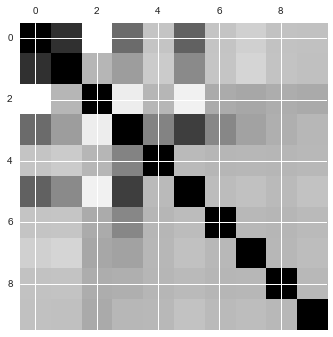

In [384]:
plt.matshow(df4.corr())

In [385]:
corr>0.6

,ACT PRICE_PER_ML,LIST_PRICE_PER ML,DISCOUNT_PER_ML,DSP,IsD11,IsD11PS,IsD9,IsD12PS,IsD12,IsOtherLV1Campaign
ACT PRICE_PER_ML,True,True,False,False,False,False,False,False,False,False
LIST_PRICE_PER ML,True,True,False,False,False,False,False,False,False,False
DISCOUNT_PER_ML,False,False,True,False,False,False,False,False,False,False
DSP,False,False,False,True,False,True,False,False,False,False
IsD11,False,False,False,False,True,False,False,False,False,False
IsD11PS,False,False,False,True,False,True,False,False,False,False
IsD9,False,False,False,False,False,False,True,False,False,False
IsD12PS,False,False,False,False,False,False,False,True,False,False
IsD12,False,False,False,False,False,False,False,False,True,False
IsOtherLV1Campaign,False,False,False,False,False,False,False,False,False,True


In [386]:
df5 = df4.drop(['ACT PRICE_PER_ML','LIST_PRICE_PER ML'],axis = 1)

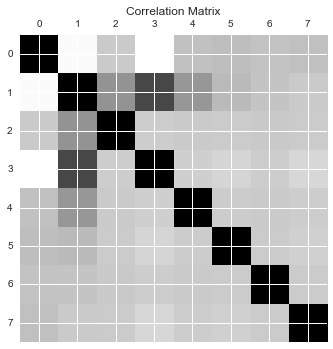

In [387]:
plt.matshow(df5.corr())
plt.title("Correlation Matrix")

In [388]:
df5.head()

,DISCOUNT_PER_ML,DSP,IsD11,IsD11PS,IsD9,IsD12PS,IsD12,IsOtherLV1Campaign
2016-07-01,0.338426,5105.55,0,0,0,0,0,0
2016-07-02,0.336245,432.01,0,0,0,0,0,0
2016-07-03,0.335977,0.00,0,0,0,0,0,0
2016-07-04,0.323981,0.00,0,0,0,0,0,0
2016-07-05,0.322518,0.00,0,0,0,0,0,0


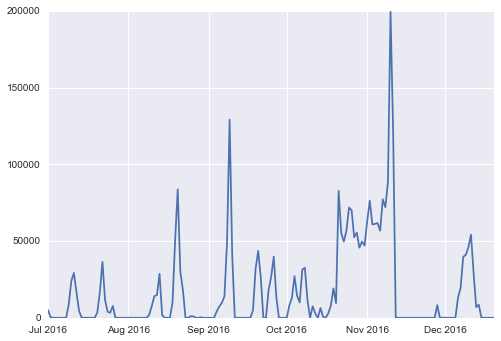

In [390]:
plt.plot(df5.DSP)

In [391]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(df5, y)
# The coefficients
print('Coefficients:', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean(np.sqrt(regr.predict(df5) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print "R Squared score:";regr.score(df5, y)

('Coefficients:', array([  7.44356e+06,   3.52213e+01,   6.68821e+07,  -2.35468e+06,
         3.45423e+06,  -1.78484e+06,   2.43065e+07,   4.03154e+05]))
Mean squared error: 600101.33
R Squared score:


0.97320574055655718

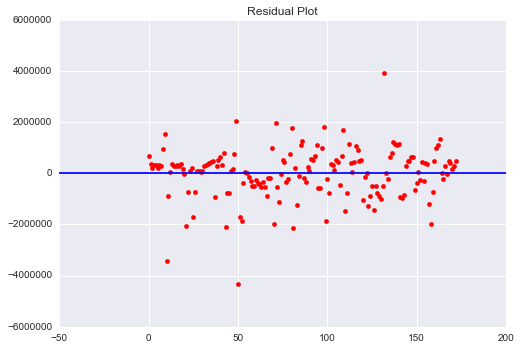

In [392]:
res = regr.predict(df5) - y
plt.axhline(0)
plt.scatter(range(len(res)),res.values,color = 'r')
plt.title('Residual Plot')

In [393]:
regr.coef_

array([  7.44356e+06,   3.52213e+01,   6.68821e+07,  -2.35468e+06,
         3.45423e+06,  -1.78484e+06,   2.43065e+07,   4.03154e+05])

In [394]:
regr.intercept_

-1093055.9359365664

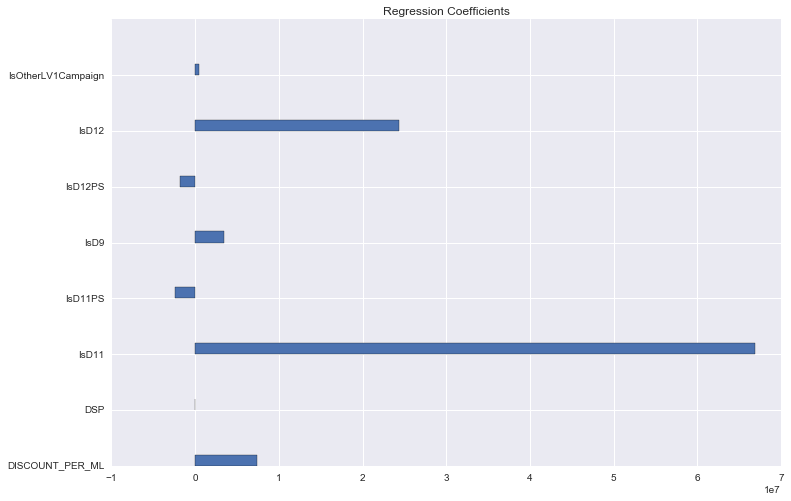

In [395]:
plt.figure(figsize=(12,8))
plt.barh(range(len(regr.coef_)),regr.coef_,height=0.2,tick_label = df5.columns)
plt.title('Regression Coefficients')

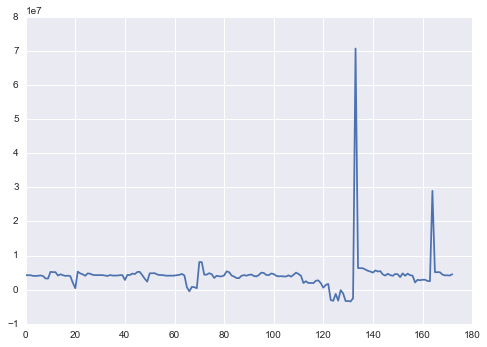

In [396]:
plt.plot(regr.predict(df5_scaled))

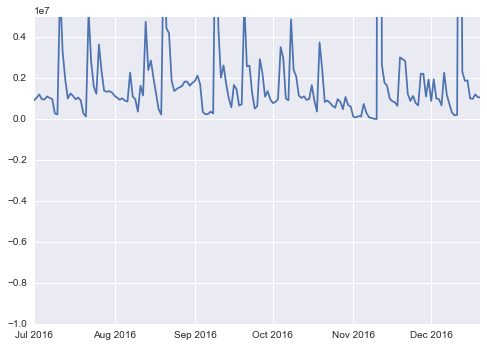

In [397]:
plt.ylim(-1e7,0.5e7)
plt.plot(y)

In [398]:
df5.describe()

,DISCOUNT_PER_ML,DSP,IsD11,IsD11PS,IsD9,IsD12PS,IsD12,IsOtherLV1Campaign
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,0.318327,16994.226821,0.005780,0.121387,0.011561,0.040462,0.005780,0.052023
std,0.092524,28872.259940,0.076029,0.327525,0.107208,0.197613,0.076029,0.222718
min,-0.016396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.336880,999.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.360965,26264.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.475583,199437.120000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [413]:
df_base = df5[(df5.DISCOUNT_PER_ML < 0.319629) & (df5.DSP == 0) ]

In [414]:
index = df_base.index
base = y[index].mean()
base

1103122.142857143

In [415]:
df_base_2 = df5.copy()

In [416]:
for col in df_base_2.columns:
    if col != 'DISCOUNT_PER_ML':
        df_base_2[col] = df_base_2[col].apply(lambda x:0)

In [417]:
df_base_2.head()

,DISCOUNT_PER_ML,DSP,IsD11,IsD11PS,IsD9,IsD12PS,IsD12,IsOtherLV1Campaign
2016-07-01,0.338426,0,0,0,0,0,0,0
2016-07-02,0.336245,0,0,0,0,0,0,0
2016-07-03,0.335977,0,0,0,0,0,0,0
2016-07-04,0.323981,0,0,0,0,0,0,0
2016-07-05,0.322518,0,0,0,0,0,0,0


In [418]:
y2 =(regr.predict(df_base_2))

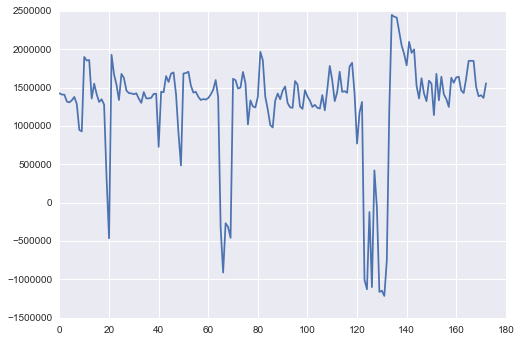

In [419]:
plt.plot(y2)

In [420]:
df_base_3 = df5.copy()

In [421]:
for col in df_base_3.columns:
    if col not in  ['DISCOUNT_PER_ML','DSP']:
        df_base_3[col] = df_base_3[col].apply(lambda x:0)

In [422]:
df_base_3.head()

,DISCOUNT_PER_ML,DSP,IsD11,IsD11PS,IsD9,IsD12PS,IsD12,IsOtherLV1Campaign
2016-07-01,0.338426,5105.55,0,0,0,0,0,0
2016-07-02,0.336245,432.01,0,0,0,0,0,0
2016-07-03,0.335977,0.00,0,0,0,0,0,0
2016-07-04,0.323981,0.00,0,0,0,0,0,0
2016-07-05,0.322518,0.00,0,0,0,0,0,0


In [423]:
y3 = regr.predict(df_base_3)

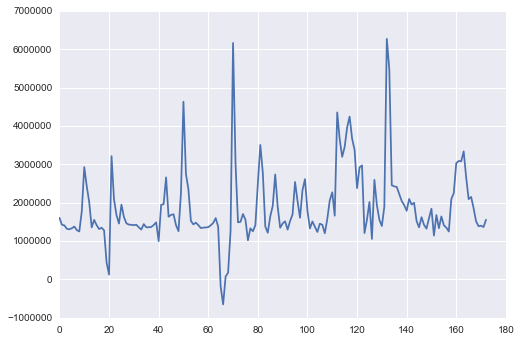

In [424]:
plt.plot(y3)

In [425]:
y4 = regr.predict(df5)

In [426]:
y = np.row_stack(([base]*len(y2),y2,y3,y4))   

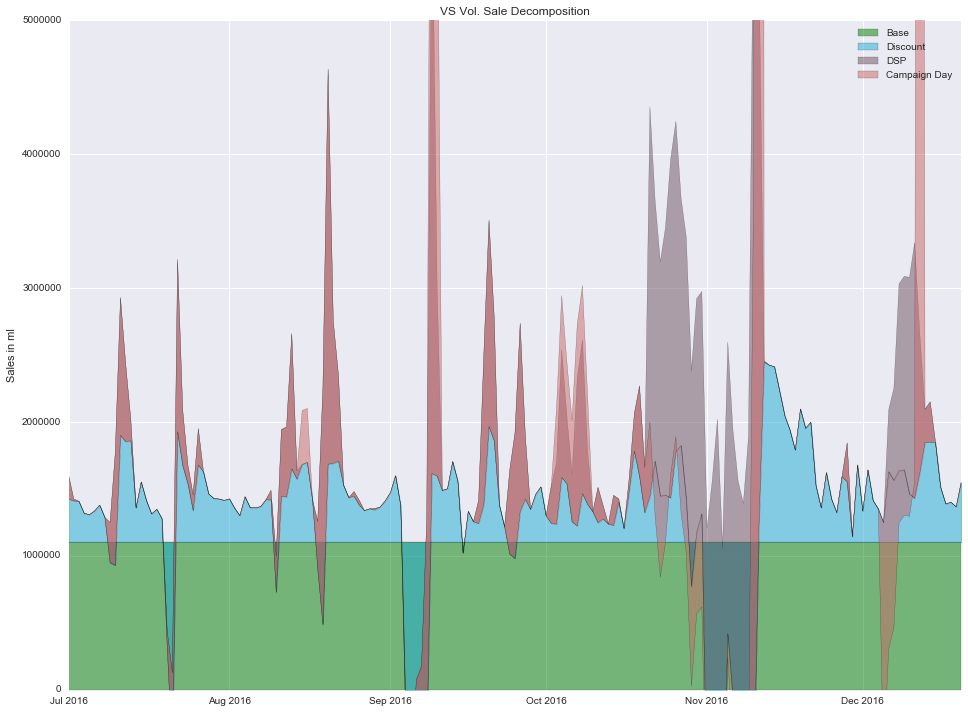

In [432]:
x = df5.index
#y_stack = NP.cumsum(y, axis=0)   # a 3x10 array

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111)

ax1.fill_between(x, 0, y[0,:], facecolor="g", alpha=.5,label = 'Base')
ax1.fill_between(x, y[0,:], y[1,:], facecolor="#1DACD6", alpha=.5,label = 'Discount')
ax1.fill_between(x, y[1,:], y[2,:], facecolor="#6E5160",alpha=.5,label = 'DSP')
ax1.fill_between(x, y[1,:], y[3,:], facecolor="#CC6666",alpha=.5,label = 'Campaign Day')
plt.ylim(0e7,0.5e7)
plt.legend()
plt.title('VS Vol. Sale Decomposition')
plt.ylabel('Sales in ml')
plt.show()